## CSU Theory Group Coding Camp, Fall 2022
### MDS Analysis of Tanimoto Similarity
#### 09/14/2022

Here, we'll use MDS to analyze the dimensionality of the chemical space spanned by a dataset of 873 solute molecules, sampled from the Kim group's solubility database.


In [6]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

import rdkit
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import rdFingerprintGenerator
import itertools
import scipy.stats
from scipy.spatial import distance
import collections

rdkit.__version__

'2022.03.5'

Read in the smiles strings

In [3]:
mol_names = []
with open('mol_names.txt', 'r') as infile:
    for line in infile:
        mol_names.append(line)

print(len(list(set(mol_names))))


872


In [20]:
fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=7,fpSize=4096)
mols = [Chem.MolFromSmiles(x) for x in mol_names]
fps = [fpgen.GetFingerprint(m) for m in mols]
#fps = [FingerprintMols.FingerprintMol(x) for x in mols]
tanimoto_matrix2 = pd.DataFrame()
for n in tqdm(range(len(fps))):
    s = DataStructs.BulkTanimotoSimilarity(fps[n], fps)
    d = [1. - x for x in s]
    tanimoto_matrix2[mol_names[n]] = d

[13:36:46] WARNING: not removing hydrogen atom without neighbors
[13:36:46] WARNING: not removing hydrogen atom without neighbors
[13:36:46] WARNING: not removing hydrogen atom without neighbors
[13:36:46] WARNING: not removing hydrogen atom without neighbors
[13:36:46] WARNING: not removing hydrogen atom without neighbors
[13:36:46] WARNING: not removing hydrogen atom without neighbors
[13:36:46] WARNING: not removing hydrogen atom without neighbors
[13:36:46] WARNING: not removing hydrogen atom without neighbors
  6%|▋         | 55/872 [00:00<00:01, 544.50it/s]/tmp/ipykernel_1307597/4117973038.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix2[mol_names[n]] = d
/tmp/ipykernel_1307597/4117973038.py:9: PerformanceWarning: DataFrame is high

In [24]:
len(s)

872

In [19]:
mols = [Chem.MolFromSmiles(x) for x in mol_names]
fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=7,fpSize=4096)
fps = [fpgen.GetFingerprint(m) for m in mols]

#fps = [FingerprintMols.FingerprintMol(x) for x in mols]
tanimoto_matrix = pd.DataFrame()
for n in tqdm(range(len(fps))):
    s = DataStructs.BulkTanimotoSimilarity(fps[n], fps)
    tanimoto_matrix[mol_names[n]] = s

[13:36:40] WARNING: not removing hydrogen atom without neighbors
[13:36:40] WARNING: not removing hydrogen atom without neighbors
[13:36:40] WARNING: not removing hydrogen atom without neighbors
[13:36:40] WARNING: not removing hydrogen atom without neighbors
[13:36:40] WARNING: not removing hydrogen atom without neighbors
[13:36:40] WARNING: not removing hydrogen atom without neighbors
[13:36:40] WARNING: not removing hydrogen atom without neighbors
[13:36:40] WARNING: not removing hydrogen atom without neighbors
  8%|▊         | 66/872 [00:00<00:01, 653.69it/s]/tmp/ipykernel_1307597/1224502370.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tanimoto_matrix[mol_names[n]] = s
/tmp/ipykernel_1307597/1224502370.py:9: PerformanceWarning: DataFrame is highl

In [21]:
tanimoto_matrix

,NC(=O)Nc1ccccc1\n,CC1=NC(=NC=C1)NS(=O)(=O)C2=CC=C(C=C2)N\n,Nc1ccc(cc1)[S](=O)(=O)Nc2ncccn2\n,CCc1ccc(C=O)cc1\n,S\n,CCCSCCC\n,O=C(C1=CC=CC=C1)C(O)C2=CC=CC=C2\n,Cc1ccccc1Br\n,CCCNCCC\n,CC(O)=O\n,...,CCCC(C)Cl\n,CC(C)[C@H](C)[C@@H](O)[C@H](O)[C@@H](C)[C@H]1CC[C@H]2[C@@H]3COC(=O)[C@H]4C[C@H](O)[C@H](O)C[C@]4(C)[C@H]3CC[C@]12C\n,CCO\n,O=C(O)c1ccc(F)cc1\n,[Na+].CC1(C)SC2C(NC(=O)C(N)c3ccccc3)C(=O)N2C1C([O-])=O\n,Oc1ccc(cc1)[N+]([O-])=O\n,O=C(O)CCCc1ccccc1\n,C1CC(=O)N(C1=O)OC(=O)OCC2C3=CC=CC=C3C4=CC=CC=C24\n,[Br-].CCCCCCCCCCCCCCCC[N+](C)(C)C\n,CCN1C=C(C(O)=O)C(=O)c2cc(F)c(nc12)N3CCNCC3\n
0,1.000000,0.085714,0.111111,0.090909,0.000000,0.000000,0.200000,0.135135,0.028571,0.103448,...,0.000000,0.021277,0.000000,0.150000,0.134831,0.095238,0.239130,0.109756,0.000000,0.061224
1,0.085714,1.000000,0.462687,0.085714,0.000000,0.015873,0.047619,0.076923,0.032258,0.034483,...,0.015625,0.029940,0.017544,0.057143,0.057377,0.057143,0.049383,0.034783,0.021053,0.047619
2,0.111111,0.462687,1.000000,0.060606,0.000000,0.000000,0.064935,0.066667,0.017544,0.018868,...,0.000000,0.024691,0.000000,0.062500,0.060345,0.062500,0.067568,0.046296,0.011111,0.032787
3,0.090909,0.085714,0.060606,1.000000,0.041667,0.090909,0.071429,0.105263,0.090909,0.066667,...,0.088235,0.028571,0.111111,0.095238,0.052083,0.095238,0.117647,0.058140,0.061538,0.061224
4,0.000000,0.000000,0.000000,0.041667,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,0.095238,0.057143,0.062500,0.095238,0.000000,0.000000,0.094340,0.081081,0.000000,0.071429,...,0.000000,0.028986,0.037037,0.128205,0.064516,1.000000,0.100000,0.047059,0.000000,0.040816
868,0.239130,0.049383,0.067568,0.117647,0.000000,0.022727,0.189655,0.108696,0.022727,0.138889,...,0.022222,0.020000,0.054054,0.170213,0.100000,0.100000,1.000000,0.098901,0.026316,0.076190
869,0.109756,0.034783,0.046296,0.058140,0.000000,0.012821,0.084211,0.062500,0.012821,0.041667,...,0.012658,0.038889,0.013889,0.072289,0.082707,0.047059,0.098901,1.000000,0.009009,0.065217
870,0.000000,0.021053,0.011111,0.061538,0.000000,0.075472,0.012500,0.016129,0.075472,0.019231,...,0.094340,0.006098,0.062500,0.000000,0.008264,0.000000,0.026316,0.009009,1.000000,0.033058


MDS uses a distance matrix, not a similarity matrix - the elements on the diagonal need to be zero. In our case, we'll do this by just subtracting each element from 1

In [22]:
tanimoto_matrix2

,NC(=O)Nc1ccccc1\n,CC1=NC(=NC=C1)NS(=O)(=O)C2=CC=C(C=C2)N\n,Nc1ccc(cc1)[S](=O)(=O)Nc2ncccn2\n,CCc1ccc(C=O)cc1\n,S\n,CCCSCCC\n,O=C(C1=CC=CC=C1)C(O)C2=CC=CC=C2\n,Cc1ccccc1Br\n,CCCNCCC\n,CC(O)=O\n,...,CCCC(C)Cl\n,CC(C)[C@H](C)[C@@H](O)[C@H](O)[C@@H](C)[C@H]1CC[C@H]2[C@@H]3COC(=O)[C@H]4C[C@H](O)[C@H](O)C[C@]4(C)[C@H]3CC[C@]12C\n,CCO\n,O=C(O)c1ccc(F)cc1\n,[Na+].CC1(C)SC2C(NC(=O)C(N)c3ccccc3)C(=O)N2C1C([O-])=O\n,Oc1ccc(cc1)[N+]([O-])=O\n,O=C(O)CCCc1ccccc1\n,C1CC(=O)N(C1=O)OC(=O)OCC2C3=CC=CC=C3C4=CC=CC=C24\n,[Br-].CCCCCCCCCCCCCCCC[N+](C)(C)C\n,CCN1C=C(C(O)=O)C(=O)c2cc(F)c(nc12)N3CCNCC3\n
0,0.000000,0.914286,0.888889,0.909091,1.000000,1.000000,0.800000,0.864865,0.971429,0.896552,...,1.000000,0.978723,1.000000,0.850000,0.865169,0.904762,0.760870,0.890244,1.000000,0.938776
1,0.914286,0.000000,0.537313,0.914286,1.000000,0.984127,0.952381,0.923077,0.967742,0.965517,...,0.984375,0.970060,0.982456,0.942857,0.942623,0.942857,0.950617,0.965217,0.978947,0.952381
2,0.888889,0.537313,0.000000,0.939394,1.000000,1.000000,0.935065,0.933333,0.982456,0.981132,...,1.000000,0.975309,1.000000,0.937500,0.939655,0.937500,0.932432,0.953704,0.988889,0.967213
3,0.909091,0.914286,0.939394,0.000000,0.958333,0.909091,0.928571,0.894737,0.909091,0.933333,...,0.911765,0.971429,0.888889,0.904762,0.947917,0.904762,0.882353,0.941860,0.938462,0.938776
4,1.000000,1.000000,1.000000,0.958333,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,0.904762,0.942857,0.937500,0.904762,1.000000,1.000000,0.905660,0.918919,1.000000,0.928571,...,1.000000,0.971014,0.962963,0.871795,0.935484,0.000000,0.900000,0.952941,1.000000,0.959184
868,0.760870,0.950617,0.932432,0.882353,1.000000,0.977273,0.810345,0.891304,0.977273,0.861111,...,0.977778,0.980000,0.945946,0.829787,0.900000,0.900000,0.000000,0.901099,0.973684,0.923810
869,0.890244,0.965217,0.953704,0.941860,1.000000,0.987179,0.915789,0.937500,0.987179,0.958333,...,0.987342,0.961111,0.986111,0.927711,0.917293,0.952941,0.901099,0.000000,0.990991,0.934783
870,1.000000,0.978947,0.988889,0.938462,1.000000,0.924528,0.987500,0.983871,0.924528,0.980769,...,0.905660,0.993902,0.937500,1.000000,0.991736,1.000000,0.973684,0.990991,0.000000,0.966942


In [23]:
dissim_matrix = 1 - tanimoto_matrix
dissim_matrix

,NC(=O)Nc1ccccc1\n,CC1=NC(=NC=C1)NS(=O)(=O)C2=CC=C(C=C2)N\n,Nc1ccc(cc1)[S](=O)(=O)Nc2ncccn2\n,CCc1ccc(C=O)cc1\n,S\n,CCCSCCC\n,O=C(C1=CC=CC=C1)C(O)C2=CC=CC=C2\n,Cc1ccccc1Br\n,CCCNCCC\n,CC(O)=O\n,...,CCCC(C)Cl\n,CC(C)[C@H](C)[C@@H](O)[C@H](O)[C@@H](C)[C@H]1CC[C@H]2[C@@H]3COC(=O)[C@H]4C[C@H](O)[C@H](O)C[C@]4(C)[C@H]3CC[C@]12C\n,CCO\n,O=C(O)c1ccc(F)cc1\n,[Na+].CC1(C)SC2C(NC(=O)C(N)c3ccccc3)C(=O)N2C1C([O-])=O\n,Oc1ccc(cc1)[N+]([O-])=O\n,O=C(O)CCCc1ccccc1\n,C1CC(=O)N(C1=O)OC(=O)OCC2C3=CC=CC=C3C4=CC=CC=C24\n,[Br-].CCCCCCCCCCCCCCCC[N+](C)(C)C\n,CCN1C=C(C(O)=O)C(=O)c2cc(F)c(nc12)N3CCNCC3\n
0,0.000000,0.914286,0.888889,0.909091,1.000000,1.000000,0.800000,0.864865,0.971429,0.896552,...,1.000000,0.978723,1.000000,0.850000,0.865169,0.904762,0.760870,0.890244,1.000000,0.938776
1,0.914286,0.000000,0.537313,0.914286,1.000000,0.984127,0.952381,0.923077,0.967742,0.965517,...,0.984375,0.970060,0.982456,0.942857,0.942623,0.942857,0.950617,0.965217,0.978947,0.952381
2,0.888889,0.537313,0.000000,0.939394,1.000000,1.000000,0.935065,0.933333,0.982456,0.981132,...,1.000000,0.975309,1.000000,0.937500,0.939655,0.937500,0.932432,0.953704,0.988889,0.967213
3,0.909091,0.914286,0.939394,0.000000,0.958333,0.909091,0.928571,0.894737,0.909091,0.933333,...,0.911765,0.971429,0.888889,0.904762,0.947917,0.904762,0.882353,0.941860,0.938462,0.938776
4,1.000000,1.000000,1.000000,0.958333,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,0.904762,0.942857,0.937500,0.904762,1.000000,1.000000,0.905660,0.918919,1.000000,0.928571,...,1.000000,0.971014,0.962963,0.871795,0.935484,0.000000,0.900000,0.952941,1.000000,0.959184
868,0.760870,0.950617,0.932432,0.882353,1.000000,0.977273,0.810345,0.891304,0.977273,0.861111,...,0.977778,0.980000,0.945946,0.829787,0.900000,0.900000,0.000000,0.901099,0.973684,0.923810
869,0.890244,0.965217,0.953704,0.941860,1.000000,0.987179,0.915789,0.937500,0.987179,0.958333,...,0.987342,0.961111,0.986111,0.927711,0.917293,0.952941,0.901099,0.000000,0.990991,0.934783
870,1.000000,0.978947,0.988889,0.938462,1.000000,0.924528,0.987500,0.983871,0.924528,0.980769,...,0.905660,0.993902,0.937500,1.000000,0.991736,1.000000,0.973684,0.990991,0.000000,0.966942


If you try to do an MDS embedding with scikit-learn, this is what you get:

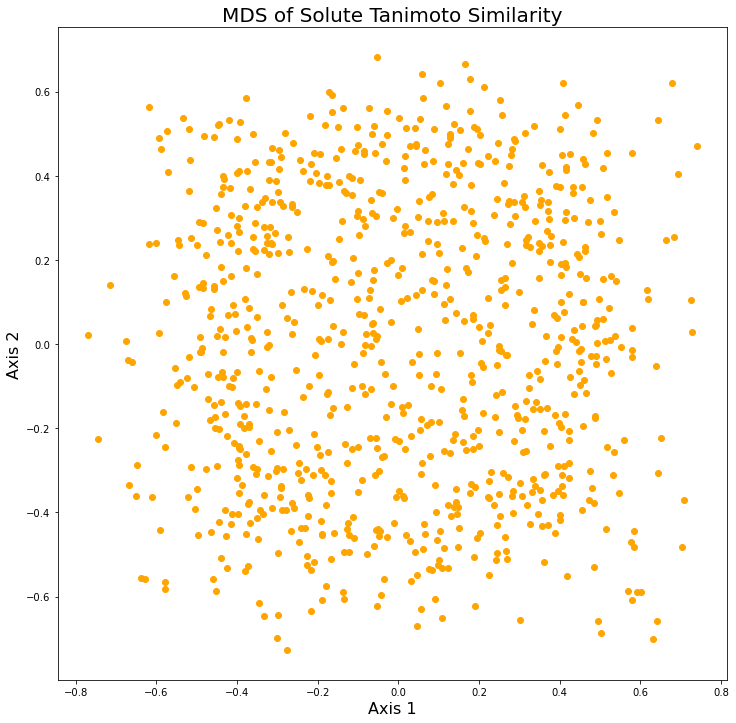

In [82]:
from sklearn.manifold import MDS

embedding_metric = MDS(metric = True, dissimilarity = 'precomputed', n_components = 2)
X_transformed_metric = embedding_metric.fit_transform(dissim_matrix)

embedding = MDS(metric = False, dissimilarity = 'precomputed', n_components = 2)
X_transformed = embedding.fit_transform(dissim_matrix)

fig=plt.figure(figsize = (12, 12))
ax = fig.add_subplot()
ax.set_title('MDS of Solute Tanimoto Similarity', fontsize=20)
ax.set_xlabel('Axis 1', fontsize=16)
ax.set_ylabel('Axis 2', fontsize=16)
#ax = plt.scatter(X_transformed_metric[:,0], X_transformed_metric[:,1], color = 'blue')
ax = plt.scatter(X_transformed[:,0], X_transformed[:,1], color = 'orange')

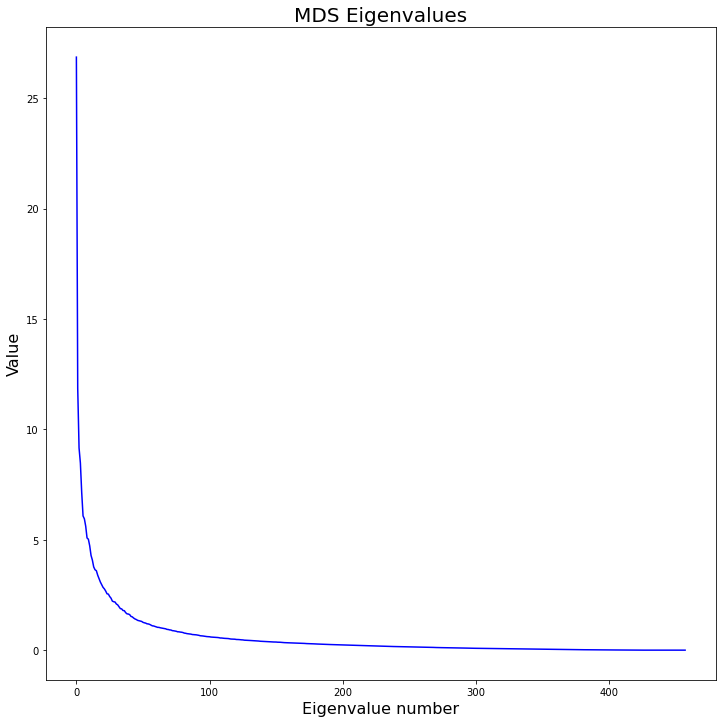

In [84]:
a = -0.5 * (dissim_matrix) ** 2
#doubly center data:
H = np.eye(a.shape[0])-(1/(a.shape[0]))*np.ones(a.shape)
B = H @ a @ H
eigval, eigvec = np.linalg.eig(B)
V_til = eigvec @ np.sqrt(np.diag(eigval))
#Now, find the number of positive eigenvalues, and just get the positive columns
d = np.real(sorted([i for i in eigval if i > 0], reverse = True))
fig=plt.figure(figsize = (12, 12))
ax = fig.add_subplot()
ax.set_title('MDS Eigenvalues', fontsize=20)
ax.set_xlabel('Eigenvalue number', fontsize=16)
ax.set_ylabel('Value', fontsize=16)
ax = plt.plot(range(len(d)), d, color = 'blue')

Now, lets assess the dimensionality of the dataset. The "strain" here represents the distortion of the distances in a space with dimensions lower than the total dimensionality of the dataset.

In [61]:
print(f'Total dimensionality of the dataset: {len(d)}')

Total dimensionality of the dataset: 458


In [62]:
tot_eig = d.sum()
running = 0
for ind_, val in enumerate(d):
    running += val
    if(running/tot_eig > 0.95):
        print(f'Number of dimensions needed to reduce strain to 5%: {ind_}')
        break

Number of dimensions needed to reduce strain to 5%: 224


Thus, although our dataset supposedly lives in 458 chemical space dimensions, we can project it down to 224 dimensions, and only change the distances by 5%

While this may seem hand-wavy, its always a good idea to verify the dimensionality in chemical space of your dataset. Coupling this with a functional group analysis is a good way to ensure your dataset is diverse!

In [88]:
from rdkit.Chem import FunctionalGroups
fgs = FunctionalGroups.BuildFuncGroupHierarchy()


from collections import namedtuple
nt = namedtuple('pattern','smarts mol')
def flattenFgs(fgs,res):
    if not fgs:
        return
    for x in fgs:
        res[x.label]=nt(x.smarts,x.pattern)
        flattenFgs(x.children,res)
        
allFgDefs={}
flattenFgs(fgs,allFgDefs)
allFgNames=sorted(allFgDefs.keys())

In [89]:
allFgs={}
for fgn in allFgNames:
    patt = allFgDefs[fgn]
    allFgs[fgn]=[m for m in mols if m.HasSubstructMatch(patt.mol)]

In [90]:
fg_binned = {}
for fgn in allFgNames:
    patt = allFgDefs[fgn]
    fg_binned[fgn]=[ind for ind, m in enumerate(mols) if m.HasSubstructMatch(patt.mol)]
    print(f'{fgn}: Found {len(fg_binned[fgn])}')   

AcidChloride: Found 0
AcidChloride.Aliphatic: Found 0
AcidChloride.Aromatic: Found 0
Alcohol: Found 171
Alcohol.Aliphatic: Found 118
Alcohol.Aromatic: Found 66
Aldehyde: Found 27
Aldehyde.Aliphatic: Found 8
Aldehyde.Aromatic: Found 19
Amine: Found 197
Amine.Aliphatic: Found 123
Amine.Aromatic: Found 88
Amine.Cyclic: Found 38
Amine.Primary: Found 120
Amine.Primary.Aliphatic: Found 62
Amine.Primary.Aromatic: Found 60
Amine.Secondary: Found 44
Amine.Secondary.Aliphatic: Found 34
Amine.Secondary.Aromatic: Found 10
Amine.Tertiary: Found 46
Amine.Tertiary.Aliphatic: Found 31
Amine.Tertiary.Aromatic: Found 2
Azide: Found 0
Azide.Aliphatic: Found 0
Azide.Aromatic: Found 0
BoronicAcid: Found 0
BoronicAcid.Aliphatic: Found 0
BoronicAcid.Aromatic: Found 0
CarboxylicAcid: Found 164
CarboxylicAcid.Aliphatic: Found 109
CarboxylicAcid.AlphaAmino: Found 1
CarboxylicAcid.Aromatic: Found 55
Halogen: Found 158
Halogen.Aliphatic: Found 45
Halogen.Aromatic: Found 113
Halogen.Bromine: Found 32
Halogen.Bromi

In [91]:
fgs = {}
for name, mol in zip(mol_names,mols):
    fgs[name]=[]
    for fgn in allFgNames:
        patt = allFgDefs[fgn]
        batch = fgn.split('.')[0]
        if mol.HasSubstructMatch(patt.mol):
            fgs[name].append(batch)

In [92]:
fgs

{'NC(=O)Nc1ccccc1\n': [],
 'CC1=NC(=NC=C1)NS(=O)(=O)C2=CC=C(C=C2)N\n': ['Amine',
  'Amine',
  'Amine',
  'Amine'],
 'Nc1ccc(cc1)[S](=O)(=O)Nc2ncccn2\n': ['Amine', 'Amine', 'Amine', 'Amine'],
 'CCc1ccc(C=O)cc1\n': ['Aldehyde', 'Aldehyde'],
 'S\n': [],
 'CCCSCCC\n': [],
 'O=C(C1=CC=CC=C1)C(O)C2=CC=CC=C2\n': ['Alcohol', 'Alcohol'],
 'Cc1ccccc1Br\n': ['Halogen',
  'Halogen',
  'Halogen',
  'Halogen',
  'Halogen',
  'Halogen'],
 'CCCNCCC\n': ['Amine', 'Amine', 'Amine', 'Amine'],
 'CC(O)=O\n': ['CarboxylicAcid', 'CarboxylicAcid'],
 'O=C1CCC(=O)N1\n': [],
 '[Na+].Nc1ccc(cc1)[S](=O)(=O)[N-]c2sccn2\n': ['Amine',
  'Amine',
  'Amine',
  'Amine'],
 'Oc1ccc(Cl)cc1\n': ['Alcohol',
  'Alcohol',
  'Halogen',
  'Halogen',
  'Halogen',
  'Halogen'],
 'O[N+]([O-])=O\n': [],
 'O=C1CCCC1\n': [],
 'OCC(NC(=O)C(Cl)Cl)C(O)c1ccc(cc1)[N+]([O-])=O\n': ['Alcohol',
  'Alcohol',
  'Nitro',
  'Nitro'],
 'CN(C)C=O\n': [],
 'C1CCCC1\n': [],
 'c1cc(C=O)ccc1[N+](=O)[O-]\n': ['Aldehyde', 'Aldehyde', 'Nitro', 'Nitro'],
 

In [93]:
fg_hist = {}
for key in fg_binned.keys():
    fg_hist[key] = len(fg_binned[key])
fg_hist

{'AcidChloride': 0,
 'AcidChloride.Aliphatic': 0,
 'AcidChloride.Aromatic': 0,
 'Alcohol': 171,
 'Alcohol.Aliphatic': 118,
 'Alcohol.Aromatic': 66,
 'Aldehyde': 27,
 'Aldehyde.Aliphatic': 8,
 'Aldehyde.Aromatic': 19,
 'Amine': 197,
 'Amine.Aliphatic': 123,
 'Amine.Aromatic': 88,
 'Amine.Cyclic': 38,
 'Amine.Primary': 120,
 'Amine.Primary.Aliphatic': 62,
 'Amine.Primary.Aromatic': 60,
 'Amine.Secondary': 44,
 'Amine.Secondary.Aliphatic': 34,
 'Amine.Secondary.Aromatic': 10,
 'Amine.Tertiary': 46,
 'Amine.Tertiary.Aliphatic': 31,
 'Amine.Tertiary.Aromatic': 2,
 'Azide': 0,
 'Azide.Aliphatic': 0,
 'Azide.Aromatic': 0,
 'BoronicAcid': 0,
 'BoronicAcid.Aliphatic': 0,
 'BoronicAcid.Aromatic': 0,
 'CarboxylicAcid': 164,
 'CarboxylicAcid.Aliphatic': 109,
 'CarboxylicAcid.AlphaAmino': 1,
 'CarboxylicAcid.Aromatic': 55,
 'Halogen': 158,
 'Halogen.Aliphatic': 45,
 'Halogen.Aromatic': 113,
 'Halogen.Bromine': 32,
 'Halogen.Bromine.Aliphatic': 12,
 'Halogen.Bromine.Aromatic': 20,
 'Halogen.Bromine.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

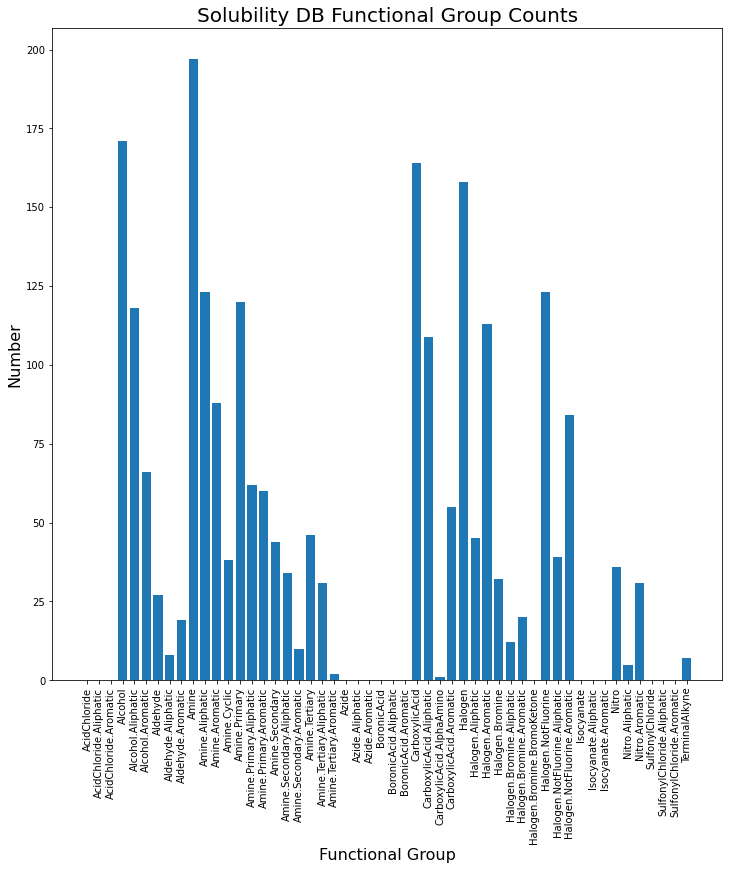

In [94]:
fig=plt.figure(figsize = (12, 12))
ax = fig.add_subplot()
ax.set_title('Solubility DB Functional Group Counts', fontsize=20)
ax.set_xlabel('Functional Group', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax = plt.bar(fg_hist.keys(), fg_hist.values())
plt.xticks(rotation=90)